# Trabajando con los datos de 'Credit One'
## Construir y Evaluar los Modelos

### 1. Preparar el Entorno

#### a) Cargar las librerias

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### b) Cargar la información

In [3]:
# Load dataset
filename = '.\data\iris.data.csv'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
dataset = read_csv(filename, names=names)

### 4.Evaluar algoritmos

#### a) Crear el  conjunto de datos de validación

In [4]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#### b) Opciones de prueba y métrica de evaluación

#### c) Evaluar Algoritmos: Linea Base

In [9]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.983333 (0.033333)


#### d) Comparación de Algoritmos

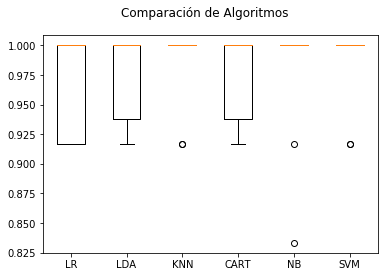

In [17]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Mejorar las Métricas

#### a) Ajuste de algoritmo

In [18]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



#### b) Conjuntos

### 6. Finalizar modelo

#### a) Realizar predicciones sobre los datos de validación

#### b) Seleccionar el modelo independiente

#### c) Salvar el modelo para nuevas predicciones